## Sinals and Systems

## Unit 2, Systems

### Rafael Figueredo Guimarães

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import timeit
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

De acordo com o livro, Lathi, o sinal é linear se atende a seguinte condição 

$ k_{1}x_{1} + k_{2}x_{2} == k_{1}y_{1} + k_{2}y_{2} $

Logo a seguinte trecho de código retorna um boolean, com True se caso seja linear, False caso contrário
~~~ python 
    if Tr(x1)(ti)+Tr(x2)(ti) != Tr(x1plusx2)(ti):
~~~

O sistema é linear.


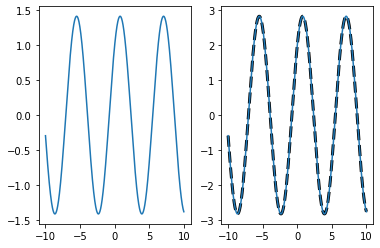

In [24]:
t = np.linspace(-10, 10, 1000)

x1 = lambda t: np.sin(t)
x2 = lambda t: np.cos(t)

def Tr(x):
    return lambda t: 2*x(t)

def checkLinearity(Tr):
     
    x1plusx2 = lambda t: x1(t) + x2(t)
    a_x1plusx2 = lambda t: a * x1plusx2  
    
    plt.subplot(121)
    plt.plot(t, x1plusx2(t), label=r'$x_1(t)+x_2(t)$')
    
    plt.subplot(122)
    
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), 'k--', lw=3, label=r'$Tr\{x_1(t)\}+Tr\{x_2(t)\}$')
    plt.plot(t, Tr(x1plusx2)(t), label=r'$Tr\{x_1(t)+x_2(t)\}$')
    
    for ti in t:
        if Tr(x1)(ti)+Tr(x2)(ti) != Tr(x1plusx2)(ti):
            return False
    return True


def testeLinearidade(Tr):
        if ( checkLinearity(Tr) ):
            print("O sistema é linear.")
        else:
            print("O sistema não é linear.")
    

testeLinearidade(Tr)

In [16]:
def Tr2(x):
    return lambda t: 2**x(t)

O sistema não é linear.


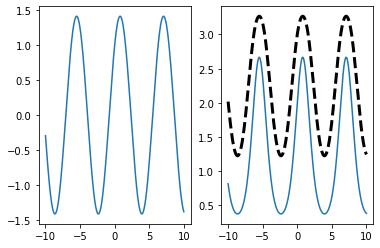

In [25]:
testeLinearidade(Tr2)

True

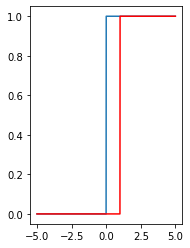

In [98]:
t = np.linspace(-5, 5, 1000)
x = lambda t: (t>=0).astype(float)

def Tr1(x):
    return lambda t: x(t-1)

def Tr2(x):
    return lambda t: x(t+1)

def checkCausality(Tr):
    
    plt.plot(t, x(t), label='Input $x(t)$')
    plt.plot(t, Tr(x)(t), label=r'Output $y(t)=Tr\{x(t)\}$', color = 'red')
    
    for ti in t:
        if Tr(x)(ti) > x(ti):
            return False
    
    return True
            
plt.subplot(121)
checkCausality(Tr1)

False

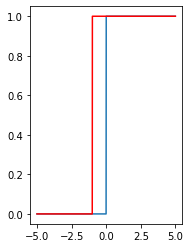

In [99]:
plt.subplot(122)
checkCausality(Tr2)

Para verificamos se o sistema possui **memória** vamos analisar 4 casos:

  1. Como a função se comporta quando recebe casos passados $Tr1 = x(t-1)$
  2. Como a função se comporta quando recebe casos futuros  $Tr2 = x(t+1)$
  3. Como a função se comporta quando recebe apenas presente $Tr3 = x(t) + 2*x(-t)$



False

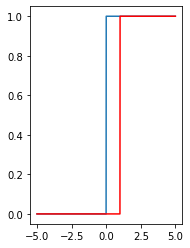

In [133]:
x = lambda t: (t>=0).astype(float)

def Tr1(x):
    return lambda t: x(t-1)

def Tr2(x):
    return lambda t: x(t+1)

def Tr3(x):
    return lambda t: 2*x(t) + x(-t)


def checkMemory(Tr):
    
    plt.plot(t, x(t), label='Input $x(t)$')
    plt.plot(t, Tr(x)(t), label=r'Output $y(t)=Tr\{x(t)\}$', color = 'red')
    
    signalzeros = 0
    signalNotzeros = 0
    
    systemzeros = 0
    systemNotzeros = 0
    
    flag = 1
    
    for ti in t:
        
        if (flag):
            fistvalue = Tr(x)(ti)
            flag = 0
            
        
        if (x(ti) == 0):
            signalzeros += 1
        else:
            signalNotzeros += 1
        
        
        if ( Tr(x)(ti) == fistvalue ):
            systemzeros += 1
        else:
            systemNotzeros += 1
            
    
    if ( systemzeros == signalzeros ): 
        return True
    else: 
        return False
            
            
plt.subplot(121)
checkMemory(Tr1)

No primeiro caso o teste retornou **True** ou seja possui memória porque depende de valores passados.

False

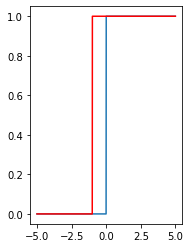

In [134]:
plt.subplot(122)
checkMemory(Tr2)

No primeiro caso o teste retornou **True**, possui memória porque depende de valores futuros.

True

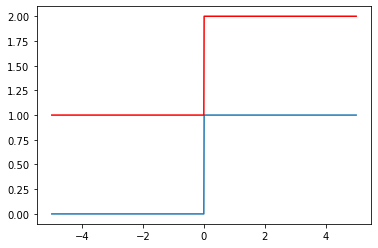

In [135]:
checkMemory(Tr3)